In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
AC = pd.read_csv('Airport_Codes.csv')

In [3]:
Flight = pd.read_csv('Flights.csv')

In [4]:
Tickets = pd.read_csv('Tickets.csv')

## Quality Check

### AirCode

In [5]:
AC.head()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [6]:
AC[(AC['TYPE']=='large_airport')&(AC['ELEVATION_FT']>=300)]
# select * from AC WHERE type='airport' and elevation>=300

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
12320,large_airport,PriÅ¡tina International Airport,1789.0,EU,XK,Prishtina,PRN,"21.035801, 42.5728"
16348,large_airport,Edmonton International Airport,2373.0,NaN,CA,Edmonton,YEG,"-113.580001831, 53.309700012200004"
16403,large_airport,Halifax / Stanfield International Airport,477.0,NaN,CA,Halifax,YHZ,"-63.5085983276, 44.8807983398"
16478,large_airport,Ottawa Macdonald-Cartier International Airport,374.0,NaN,CA,Ottawa,YOW,"-75.66919708251953, 45.3224983215332"
16588,large_airport,Winnipeg / James Armstrong Richardson Internat...,783.0,NaN,CA,Winnipeg,YWG,"-97.2398986816, 49.909999847399995"
...,...,...,...,...,...,...,...,...
55247,large_airport,Chongqing Jiangbei International Airport,1365.0,AS,CN,Chongqing,CKG,"106.64199829101562, 29.719200134277344"
55252,large_airport,Longdongbao Airport,3736.0,AS,CN,Guiyang,KWE,"106.8010025024414, 26.53849983215332"
55270,large_airport,Chengdu Shuangliu International Airport,1625.0,AS,CN,Chengdu,CTU,"103.9469985961914, 30.578500747680664"
55337,large_airport,ÃrÃ¼mqi Diwopu International Airport,2125.0,AS,CN,ÃrÃ¼mqi,URC,"87.47419738769531, 43.907100677490234"


In [7]:
AC.dtypes

TYPE             object
NAME             object
ELEVATION_FT    float64
CONTINENT        object
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object

In [8]:
AC.shape #显示行数和列数

(55369, 8)

In [9]:
AC['TYPE'].unique() #在sql里面，就是select distinct from ac

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [10]:
AC = AC[(AC['TYPE'] == 'medium_airport') | (AC['TYPE'] == 'large_airport')]
#筛选数据表里面大型和中型机场，
#方括号【】是选中xx内容，
#括号（）是选中的具体内容，即AC['TYPE'] == 'medium_airport') | (AC['TYPE'] == 'large_airport'
#AC['TYPE'] == 'medium_airport'意思是，选出type等于medium的数据
# == 是比较，相当于‘是否’，= 是赋值
# ｜是或者，&是和


In [11]:
AC = AC[(AC['ISO_COUNTRY'] == 'US')] #筛选出在美国的机场，功能和上面一样，就是分两步写

In [12]:
AC.isnull().any() #检查每一列是否有空值

TYPE            False
NAME            False
ELEVATION_FT     True
CONTINENT        True
ISO_COUNTRY     False
MUNICIPALITY     True
IATA_CODE        True
COORDINATES     False
dtype: bool

In [13]:
AC_clear=pd.DataFrame({'TYPE':AC['TYPE'],'IATA_CODE':AC['IATA_CODE']})#建一个新表只留有用的两行，不想损坏老表
AC_clear.dropna(inplace=True)#删掉含有空缺值的行

In [14]:
AC_clear.groupby('IATA_CODE').count().max()
#AC_clear.groupby('IATA_CODE').count() = select count(TYPE) as count_type from AC_clear groupby IATA_CODE
#AC_clear.groupby('IATA_CODE').count().max() = select max(count_type) from 
                                                #(select count(TYPE) as count_type from AC_clear groupby IATA_CODE)

TYPE    1
dtype: int64

In [15]:
AC_clear.drop_duplicates(inplace=True) #有➕inplace的意思是操作后的ac clear取代原先ac clear

In [16]:
AC_clear.shape

(821, 2)

### Tickets

In [17]:
Tickets = Tickets[Tickets['ROUNDTRIP']==1.0]

In [18]:
Tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
10,201912723337,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1647.0,JAX


#Use your best judgment to address any material data issues that could impact your recommendations and highlight at least 3 data quality insights

In [19]:
Tickets.isnull().any()

ITIN_ID              False
YEAR                 False
QUARTER              False
ORIGIN               False
ORIGIN_COUNTRY       False
ORIGIN_STATE_ABR     False
ORIGIN_STATE_NM      False
ROUNDTRIP            False
REPORTING_CARRIER    False
PASSENGERS            True
ITIN_FARE             True
DESTINATION          False
dtype: bool

In [20]:
Tickets.shape

(708600, 12)

In [21]:
Tickets.isnull().T.any().sum()#统计有多少行含有空值

1751

In [22]:
1751/708600 #计算空值的百分比

0.0024710697149308495

In [23]:
Tickets.YEAR.nunique()#nunique = the number of unique values 独一无二值的数量 只考虑2019年数据

1

In [24]:
Tickets.dropna(inplace=True) #drop null value

In [25]:
Tickets.dtypes

ITIN_ID                int64
YEAR                   int64
QUARTER                int64
ORIGIN                object
ORIGIN_COUNTRY        object
ORIGIN_STATE_ABR      object
ORIGIN_STATE_NM       object
ROUNDTRIP            float64
REPORTING_CARRIER     object
PASSENGERS           float64
ITIN_FARE             object
DESTINATION           object
dtype: object

In [26]:
#Make sure it can be transformed into float and no strange number
#确保把type转成合适的类型-小数
#查看ITIN_FARE有哪些独一无二的值
#题目里有$符号，需要换掉
for i in Tickets.ITIN_FARE.unique():
    print(i)

736.0
570.0
564.0
345.0
1647.0
425.0
1445.0
842.0
279.0
379.0
934.0
644.0
469.0
889.0
645.0
607.0
675.0
11.0
323.0
528.0
507.0
239.0
867.0
544.0
872.0
874.0
277.0
489.0
474.0
592.0
375.0
678.0
569.0
1188.0
482.0
409.0
523.0
470.0
450.0
576.0
1368.0
394.0
669.0
552.0
484.0
455.0
625.0
481.0
729.0
464.0
660.0
439.0
614.0
770.0
560.0
568.0
1332.0
548.0
745.0
734.0
817.0
1497.0
597.0
297.0
945.0
790.0
1250.0
440.0
462.0
349.0
703.0
429.0
559.0
370.0
630.0
899.0
765.0
1269.0
407.0
430.0
577.0
799.0
420.0
509.0
1414.0
635.0
692.0
308.0
404.0
661.0
590.0
479.0
415.0
530.0
496.0
494.0
545.0
1051.0
766.0
541.0
485.0
944.0
353.0
398.0
426.0
529.0
386.0
305.0
1157.0
540.0
609.0
309.0
1687.0
317.0
774.0
275.0
953.0
619.0
971.0
448.0
453.0
2081.0
869.0
677.0
594.0
363.0
600
543.0
459.0
573.0
369.0
499.0
1104.0
458.0
723.0
377.0
1404.0
1410.0
1728.0
715.0
534.0
1695.0
691.0
475.0
516.0
588.0
502.0
497.0
512.0
367.0
707.0
596.0
1117.0
423.0
652.0
1049.0
360.0
357.0
565.0
663.0
627.0
763.0
393.0
457.0

1462.0
1646.0
1859.0
1641.0
1503.0
2182.0
3753.0
3333.0
1657.0
1874.0
1974.0
2976.0
2054.0
3102.0
1224.0
1440.0
1685.0
2394.0
2154.0
1489.0
3616.0
1257.0
1618.0
1470.0
1882.0
2067.0
2262.0
1436.0
2340.0
1598.0
1791.0
1907.0
1975.0
2102.0
1547.0
1540.0
2228.0
2733.0
1232.0
2604.0
2031.0
1747.0
1605.0
2309.0
3835.0
1968.0
2041.0
1723.0
1937.0
2195.0
2105.0
1543.0
1813.0
1201.0
1313.0
1737.0
2035.0
2149.0
1330.0
1846.0
2571.0
2805.0
2353.0
2286.0
3308.0
2532.0
1788.0
1899.0
2482.0
2118.0
1512.0
1682.0
1520.0
3858.0
1473.0
1772.0
2069.0
1205.0
1441.0
1582.0
1774.0
2008.0
2178.0
1884.0
1390.0
1554.0
1653.0
2207.0
1784.0
1897.0
1439.0
1795.0
2254.0
1437.0
2017.0
1799.0
1923.0
2206.0
1455.0
4206.0
1615.0
1669.0
2381.0
1453.0
1744.0
1433.0
1715.0
1903.0
1604.0
1704.0
2829.0
2022.0
1714.0
16.0
2238.0
1373.0
2062.0
2115.0
1642.0
1614.0
1519.0
2569.0
2380.0
1739.0
2691.0
1587.0
3906.0
1555.0
1602.0
1904.0
1912.0
1513.0
2211.0
1364.0
1443.0
1850.0
2550.0
1726.0
2546.0
1856.0
2167.0
1889.0
2080.0
8

2265.0
2956.0
3106.0
3486.0
3086.0
3238.0
3399.0
2627.0
3466.0
3700.0
2852.0
2600.0
2138.0
2858.0
3344.0
3205.0
2808.0
4540.0
1913.0
4605.0
6370.0
3647.0
2541.0
5850.0
2335.0
4299.0
2519.0
3168.0
2592.0
3774.0
3148.0
3612.0
3253.0
8881.0
2950.0
2368.0
2744.0
3368.0
3273.0
4093.0
2657.0
3045.0
2942.0
4401.0
2111.0
3197.0
3000.0
2882.0
2224.0
2567.0
2547.0
2871.0
3042.0
4214.0
3109.0
3943.0
4239.0
4682.0
2426.0
2726.0
3505.0
4904.0
3633.0
2575.0
2868.0
3171.0
4228.0
2928.0
6326.0
2701.0
2354.0
2504.0
3567.0
3969.0
4134.0
2356.0
3070.0
3970.0
3461.0
3052.0
2831.0
1949.0
2757.0
2682.0
3226.0
3060.0
3118.0
4334.0
2422.0
2200.0
3249.0
3330.0
2880.0
2602.0
5405.0
2739.0
4175.0
2661.0
4143.0
2673.0
2717.0
2471.0
2597.0
2838.0
2802.0
2421.0
2981.0
3965.0
3351.0
4164.0
1972.0
3415.0
3638.0
2555.0
3564.0
2267.0
2745.0
3189.0
3365.0
4000.0
2607.0
3673.0
3213.0
2820.0
4295.0
8405.0
2724.0
3270.0
3296.0
2824.0
2227.0
2775.0
3325.0
2625.0
5240.0
4261.0
2261.0
2419.0
2235.0
3710.0
4324.0
2487.0
2344.0

In [27]:
Tickets['ITIN_FARE'] = Tickets['ITIN_FARE'].apply(lambda x: float(str(x).replace('$','')))
#把ITIN_FARE 从object转成float
#

In [28]:
Tickets.drop_duplicates(inplace=True)


### Flights

In [29]:
Flight.dtypes #列出所有column的data type

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object

In [30]:
Flight.isnull().any() #查看这些column里是否含有空缺值

FL_DATE              False
OP_CARRIER           False
TAIL_NUM              True
OP_CARRIER_FL_NUM    False
ORIGIN_AIRPORT_ID    False
ORIGIN               False
ORIGIN_CITY_NAME     False
DEST_AIRPORT_ID      False
DESTINATION          False
DEST_CITY_NAME       False
DEP_DELAY             True
ARR_DELAY             True
CANCELLED            False
AIR_TIME              True
DISTANCE              True
OCCUPANCY_RATE        True
dtype: bool

In [31]:
Flight.isnull().T.any().sum() #查看有多少行空缺值

57291

In [32]:
Flight.shape #查看有多少column和row

(1915886, 16)

In [33]:
57291/1915886 #查看空缺值的比例

0.02990313619912667

In [34]:
Flight.dropna(inplace=True) #删除所有含有空缺值的行，所以现在的data没有空缺值

In [35]:
Flight=Flight[Flight['CANCELLED']==0] #我只要没有被cancel的航班，cancel=1 等于没有cancel，cancel=0，等于cancel

In [36]:
Flight.head() #清理表哥之后，查看前5行

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [37]:
Flight.drop_duplicates(inplace=True) #删除所有重复行

In [38]:
Flight.shape

(1855364, 16)

## Data Merge

In [39]:
# Write a function that can link the data together in a scalable way
# 绿色字体代表是程序语言，就是define function
# 蓝色字体代表function名字
# function后面的括号代表它的参数parameters，参数代表你要输入进function的东西
# 一共5个值，它赋予了第五个值how为inner
# 加引号‘’代表是string
# 不加引号‘’，如果是数字，代表float，int，如果是字母/单词，就代表变量
# 在这个例子，merge代表inner join，default是inner join
# df= Select * from df1 inner join df2 on df1.key1=df2.key2
# df代表创建出来的新表的名字
# 第二行代表，df1表格merge/join 第二个表df2，得出来的新表格叫df，how是join的方式，这里是inner join，
# key1，key2 代表column name，key1代表key1的column name，key2代表key2的column name
#left_on，right_on是默认的parameters name
def DataInnerLink(df1,df2,key1,key2,how='inner'):
    df=df1.merge(df2,how=how,left_on=key1, right_on=key2)
    return df

In [40]:
# innner Join AirCode & Flight table to find the flights of all large & medium airports
# inner join AC_clear table with Flight table
# common column name 'IATA_CODE','DESTINATION'
df_temp1=DataInnerLink(AC_clear,Flight,'IATA_CODE','DESTINATION')
df_qualified_flight=DataInnerLink(AC_clear,df_temp1,'IATA_CODE','ORIGIN')
df_qualified_flight.head()
#三个表inner join
#第一行，是前面两个表先join
#第二行，是join玩的新表和第三个表join
#join两次是为了保证出发地和目的地都是中大型机场


,TYPE_x,IATA_CODE_x,TYPE_y,IATA_CODE_y,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,medium_airport,ABE,large_airport,ATL,2019-03-05,DL,N717JL,1586,10135,ABE,"Allentown/Bethlehem/Easton, PA",10397,ATL,"Atlanta, GA",-7.0,-13.0,0.0,110.0,692.0,0.52
1,medium_airport,ABE,large_airport,ATL,2019-03-06,DL,N991AT,1586,10135,ABE,"Allentown/Bethlehem/Easton, PA",10397,ATL,"Atlanta, GA",-7.0,-15.0,0.0,107.0,692.0,0.99
2,medium_airport,ABE,large_airport,ATL,2019-03-13,DL,N940AT,1586,10135,ABE,"Allentown/Bethlehem/Easton, PA",10397,ATL,"Atlanta, GA",-8.0,-19.0,0.0,98.0,692.0,0.72
3,medium_airport,ABE,large_airport,ATL,2019-03-10,DL,N963AT,1586,10135,ABE,"Allentown/Bethlehem/Easton, PA",10397,ATL,"Atlanta, GA",-8.0,-17.0,0.0,105.0,692.0,0.40
4,medium_airport,ABE,large_airport,ATL,2019-03-09,DL,N937AT,1586,10135,ABE,"Allentown/Bethlehem/Easton, PA",10397,ATL,"Atlanta, GA",-9.0,-11.0,0.0,103.0,692.0,0.89


In [41]:
# Calculate the mean occupancy rate for different flights of the same op_carrier, origin & destination
df_qualified_flight_extract=df_qualified_flight.groupby(['OP_CARRIER','ORIGIN','DESTINATION']).mean()['OCCUPANCY_RATE'].reset_index()
df_qualified_flight_extract.head()

,OP_CARRIER,ORIGIN,DESTINATION,OCCUPANCY_RATE
0,9E,ABE,ATL,0.643409
1,9E,ABE,DTW,0.630000
2,9E,AEX,ATL,0.647085
3,9E,AGS,ATL,0.655847
4,9E,ALB,DTW,0.681346


In [42]:
df_qualified_flight_extract.shape

(11706, 4)

In [43]:
# Join ticket table to find the round trip routes for large & medium airports for each op_carrier
df_qualified_tickets=DataInnerLink(Tickets,df_qualified_flight_extract,
                                  ['REPORTING_CARRIER','ORIGIN','DESTINATION'],['OP_CARRIER','ORIGIN','DESTINATION'])

In [44]:
#Since each plane can accommodate up to 200 passengers
df_qualified_tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,OP_CARRIER,OCCUPANCY_RATE
0,201912722904,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,470.0,DFW,MQ,0.659302
1,201912722909,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,596.0,DFW,MQ,0.659302
2,201912722899,2019,1,ABI,US,TX,Texas,1.0,MQ,2.0,286.0,DFW,MQ,0.659302
3,201912722903,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,368.0,DFW,MQ,0.659302
4,201912722906,2019,1,ABI,US,TX,Texas,1.0,MQ,2.0,501.0,DFW,MQ,0.659302


In [45]:
df_qualified_tickets.shape

(375422, 14)

### Final Complete Table

In [46]:
df_qualified_tickets

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,OP_CARRIER,OCCUPANCY_RATE
0,201912722904,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,470.0,DFW,MQ,0.659302
1,201912722909,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,596.0,DFW,MQ,0.659302
2,201912722899,2019,1,ABI,US,TX,Texas,1.0,MQ,2.0,286.0,DFW,MQ,0.659302
3,201912722903,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,368.0,DFW,MQ,0.659302
4,201912722906,2019,1,ABI,US,TX,Texas,1.0,MQ,2.0,501.0,DFW,MQ,0.659302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375417,201913322016,2019,1,PHX,US,AZ,Arizona,1.0,OO,1.0,247.0,DEN,OO,0.630000
375418,201913336645,2019,1,RDU,US,NC,North Carolina,1.0,OO,1.0,250.0,DCA,OO,0.517500
375419,201913385725,2019,1,SLC,US,UT,Utah,1.0,OO,1.0,512.0,EUG,OO,0.796667
375420,201913404416,2019,1,SUN,US,ID,Idaho,1.0,OO,1.0,884.0,DEN,OO,0.668644


## Craft a Visual Data Narrative

### Q1: The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation

In [47]:
# Assumption1: The routes for the same op_carrier in different date are all round trips
# Find the distinct list of the round trip routes
round_trip_flight=pd.DataFrame({'OP_CARRIER':df_qualified_tickets['OP_CARRIER'],
                                'ORIGIN':df_qualified_tickets['ORIGIN'],
                                'DESTINATION':df_qualified_tickets['DESTINATION']
                                
                               })
round_trip_flight.drop_duplicates(inplace=True)

In [48]:
# Find the round trip flights for medium & Large airports
#self join
round_trip_flight=DataInnerLink(round_trip_flight,df_qualified_flight,['OP_CARRIER','ORIGIN','DESTINATION'],
                               ['OP_CARRIER','ORIGIN','DESTINATION'])
round_trip_flight.head()

,OP_CARRIER,ORIGIN,DESTINATION,TYPE_x,IATA_CODE_x,TYPE_y,IATA_CODE_y,FL_DATE,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,MQ,ABI,DFW,medium_airport,ABI,large_airport,DFW,2019-03-01,N833AE,3463,10136,"Abilene, TX",11298,"Dallas/Fort Worth, TX",-8.0,-7.0,0.0,31.0,158.0,0.50
1,MQ,ABI,DFW,medium_airport,ABI,large_airport,DFW,2019-03-03,N813AE,3463,10136,"Abilene, TX",11298,"Dallas/Fort Worth, TX",-4.0,22.0,0.0,34.0,158.0,0.91
2,MQ,ABI,DFW,medium_airport,ABI,large_airport,DFW,2019-03-04,N851AE,3463,10136,"Abilene, TX",11298,"Dallas/Fort Worth, TX",-12.0,-2.0,0.0,33.0,158.0,0.94
3,MQ,ABI,DFW,medium_airport,ABI,large_airport,DFW,2019-03-07,N806AE,3463,10136,"Abilene, TX",11298,"Dallas/Fort Worth, TX",-9.0,-9.0,0.0,38.0,158.0,0.84
4,MQ,ABI,DFW,medium_airport,ABI,large_airport,DFW,2019-03-08,N826AE,3463,10136,"Abilene, TX",11298,"Dallas/Fort Worth, TX",-5.0,9.0,0.0,35.0,158.0,0.61


In [49]:
df_Q1_temp=round_trip_flight.groupby(['ORIGIN','DESTINATION']).count()['TAIL_NUM'].reset_index()
#查出每个航线里面航班数量

In [50]:
df_Q1_temp.head()

,ORIGIN,DESTINATION,TAIL_NUM
0,ABE,ATL,217
1,ABE,CLT,251
2,ABE,DTW,247
3,ABE,FLL,20
4,ABE,ORD,144


In [51]:
# Self join to calculate the round trip flight number
df_Q1_temp2=DataInnerLink(df_Q1_temp,df_Q1_temp,['ORIGIN','DESTINATION'],['DESTINATION','ORIGIN'])
# ORIGIN=DESTINATION,DESTINATION=ORIGIN,代表往返航班

In [52]:
df_Q1_temp2.head()
#说明 ABE 到ORD 是144次，ORD到ABE是145次，说明有144次round trip，和一次single trip，其他前四行航班都是一样数字，代表都是round trip。

,ORIGIN_x,DESTINATION_x,TAIL_NUM_x,ORIGIN_y,DESTINATION_y,TAIL_NUM_y
0,ABE,ATL,217,ATL,ABE,217
1,ABE,CLT,251,CLT,ABE,251
2,ABE,DTW,247,DTW,ABE,247
3,ABE,FLL,20,FLL,ABE,20
4,ABE,ORD,144,ORD,ABE,145


In [53]:
# Get rid of the opposite order of the route
#l=[]代表新建一个空的列表
#for index, row in df_Q1_temp2.iterrows():代表我逐一读取df_Q1_temp2这个表的index和total row，
#    l.append(np.sum([row['TAIL_NUM_x'],row['TAIL_NUM_y']])) 代表我把这一行里面TAIL_NUM_x这列的值和'TAIL_NUM_y'这列的值加起来，放到l里面
#append代表我往l里面加数据
#Import numpy as np
#第四行代表新建一个叫df_Q1表，first column的名字叫ORIGIN，Flight_Num代表航班总数量
l=[]
for index, row in df_Q1_temp2.iterrows():
    l.append(np.sum([row['TAIL_NUM_x'],row['TAIL_NUM_y']]))
df_Q1=pd.DataFrame({'ORIGIN':df_Q1_temp2['ORIGIN_x'],'DESTINATION':df_Q1_temp2['DESTINATION_x'],'Flight_Num':l})
df_Q1.drop_duplicates(inplace=True)
df_Q1#展示一下

,ORIGIN,DESTINATION,Flight_Num
0,ABE,ATL,434
1,ABE,CLT,502
2,ABE,DTW,494
3,ABE,FLL,40
4,ABE,ORD,289
...,...,...,...
5283,XNA,SFB,62
5284,XNA,SFO,171
5285,XNA,VPS,25
5286,YKM,SEA,610


In [54]:
df_Q1_sort = df_Q1.sort_values(by = 'Flight_Num',ascending = False).head(200)
df_Q1_sort
#通过desc Flight_Num 找出来最忙的航班

,ORIGIN,DESTINATION,Flight_Num
4741,SFO,LAX,8333
2712,LAX,SFO,8333
2809,LGA,ORD,7146
3684,ORD,LGA,7146
2678,LAX,LAS,6506
...,...,...,...
2382,ITO,HNL,2339
4440,SAN,SEA,2339
2039,HNL,ITO,2339
2358,IND,ORD,2335


In [55]:
# 现在发现都是重复来回航班，因为是round trip，所以需要去除重复航班
df_Q1_final=df_Q1.sort_values(by='Flight_Num',ascending=False)
df_Q1_final[df_Q1_final.index%2==1].reset_index(drop=True).head(20)
#第二行是使用index%2==1 来取出odd行，
#所以现在展现了前20最忙的航班（最多的航班）

,ORIGIN,DESTINATION,Flight_Num
0,SFO,LAX,8333
1,LGA,ORD,7146
2,LAX,SEA,4992
3,BOS,LGA,4816
4,LGA,BOS,4816
5,OGG,HNL,4793
6,ATL,MCO,4707
7,PDX,SEA,4662
8,ATL,LGA,4589
9,LGA,ATL,4589


## Visalization

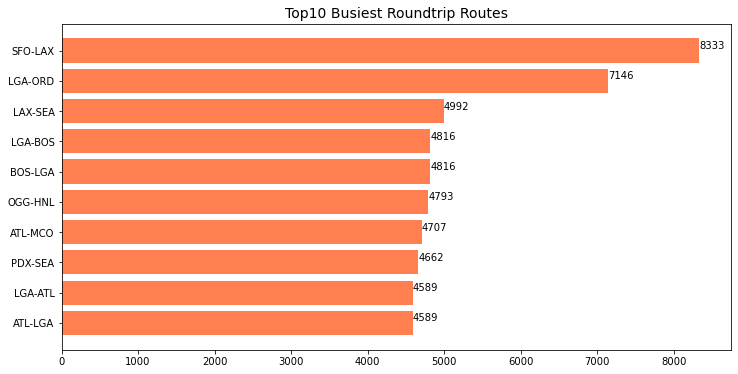

In [56]:
import matplotlib.pyplot as plt
#开始画图，所以import了画图包matplotlib
#怎么画一个横状柱状图bar graph 并且标注数字
#新建一个data frame 叫data，用来画图，
data = df_Q1_final[df_Q1_final.index%2==1].reset_index(drop=True).head(10).sort_values('Flight_Num',ascending=True)
fig, ax = plt.subplots(figsize=(12, 6)) # 我设置一个画布，长12，宽6

ax.barh(data['ORIGIN']+'-'+data['DESTINATION'], data['Flight_Num'],color='coral') #barh是横向柱状图，连起来”origin-destrination“，加上颜色

ax.set_title('Top10 Busiest Roundtrip Routes',#建title，位置，字体
             loc='center' ,fontsize=14)
for a,b in zip(data['ORIGIN']+'-'+data['DESTINATION'], data['Flight_Num']):
    plt.text(b,a,
             b,
             ha='left', 
             va='bottom',
            )
#给每个柱状图加上数字
plt.show()

### Q2: The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.

In [57]:
df_Q2 = df_qualified_tickets[['ORIGIN','DESTINATION','REPORTING_CARRIER','OCCUPANCY_RATE','PASSENGERS','ITIN_FARE']]

In [58]:
df_Q2.dtypes

ORIGIN                object
DESTINATION           object
REPORTING_CARRIER     object
OCCUPANCY_RATE       float64
PASSENGERS           float64
ITIN_FARE            float64
dtype: object

In [59]:
df_Q2

,ORIGIN,DESTINATION,REPORTING_CARRIER,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE
0,ABI,DFW,MQ,0.659302,1.0,470.0
1,ABI,DFW,MQ,0.659302,1.0,596.0
2,ABI,DFW,MQ,0.659302,2.0,286.0
3,ABI,DFW,MQ,0.659302,1.0,368.0
4,ABI,DFW,MQ,0.659302,2.0,501.0
...,...,...,...,...,...,...
375417,PHX,DEN,OO,0.630000,1.0,247.0
375418,RDU,DCA,OO,0.517500,1.0,250.0
375419,SLC,EUG,OO,0.796667,1.0,512.0
375420,SUN,DEN,OO,0.668644,1.0,884.0


In [60]:
df_Q2['REVENUE']=df_Q2['PASSENGERS']*df_Q2['ITIN_FARE']#ITIN_FARE = ticket price，求出revenue
df_Q2_extract=df_Q2.groupby(['REPORTING_CARRIER','ORIGIN','DESTINATION']).sum().reset_index()
# 统计每条航线的总收入
#REPORTING_CARRIER航空公司代号
df_Q2_extract

,REPORTING_CARRIER,ORIGIN,DESTINATION,OCCUPANCY_RATE,PASSENGERS,ITIN_FARE,REVENUE
0,9E,ABE,ATL,13.511591,23.0,11337.0,12443.0
1,9E,AEX,ATL,6.470847,13.0,4602.0,6990.0
2,9E,AGS,ATL,0.655847,1.0,436.0,436.0
3,9E,ALB,DTW,3.406731,5.0,2823.0,2823.0
4,9E,ATL,ABE,15.222137,27.0,15079.0,17396.0
...,...,...,...,...,...,...,...
10168,YX,XNA,DEN,4.483684,8.0,3191.0,3731.0
10169,YX,XNA,EWR,9.781169,20.0,8595.0,11491.0
10170,YX,XNA,IAH,8.605402,18.0,5403.0,6915.0
10171,YX,XNA,LGA,37.880000,122.0,29417.0,50520.0


In [97]:
df_Q2_extract['WAVG PRICE']=df_Q2_extract['REVENUE']/df_Q2_extract['PASSENGERS']
#wavg price = 加权平均 weight price，算平均票价

In [98]:
df_Q2_final=pd.DataFrame({'OP_CARRIER':df_Q2_extract['REPORTING_CARRIER'],
                          'ORIGIN':df_Q2_extract['ORIGIN'],
                         'DESTINATION':df_Q2_extract['DESTINATION'],
                         'WAVG PRICE':df_Q2_extract['WAVG PRICE']})

In [102]:
#求出round trip的信息，剔除single trip
#通过和round_trip_flight表格inner join，df_Q2_final表格留下了z
round_trip_flight_tickets=DataInnerLink(df_Q2_final,round_trip_flight,['OP_CARRIER','ORIGIN','DESTINATION'],
                               ['OP_CARRIER','ORIGIN','DESTINATION'])
round_trip_flight_tickets.shape

(1721422, 21)

In [103]:
round_trip_flight_tickets.head()

,OP_CARRIER,ORIGIN,DESTINATION,WAVG PRICE,TYPE_x,IATA_CODE_x,TYPE_y,IATA_CODE_y,FL_DATE,TAIL_NUM,...,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,9E,ABE,ATL,541.0,medium_airport,ABE,large_airport,ATL,2019-03-01,N304PQ,...,10135,"Allentown/Bethlehem/Easton, PA",10397,"Atlanta, GA",-9.0,-16.0,0.0,109.0,692.0,0.61
1,9E,ABE,ATL,541.0,medium_airport,ABE,large_airport,ATL,2019-03-02,N300PQ,...,10135,"Allentown/Bethlehem/Easton, PA",10397,"Atlanta, GA",-4.0,-22.0,0.0,101.0,692.0,0.69
2,9E,ABE,ATL,541.0,medium_airport,ABE,large_airport,ATL,2019-03-03,N348PQ,...,10135,"Allentown/Bethlehem/Easton, PA",10397,"Atlanta, GA",12.0,37.0,0.0,113.0,692.0,0.42
3,9E,ABE,ATL,541.0,medium_airport,ABE,large_airport,ATL,2019-03-04,N311PQ,...,10135,"Allentown/Bethlehem/Easton, PA",10397,"Atlanta, GA",-6.0,-1.0,0.0,113.0,692.0,0.80
4,9E,ABE,ATL,541.0,medium_airport,ABE,large_airport,ATL,2019-03-05,N228PQ,...,10135,"Allentown/Bethlehem/Easton, PA",10397,"Atlanta, GA",-12.0,-5.0,0.0,104.0,692.0,0.69


In [105]:
def transformNum(x):
    try:
        return float(x)
    except:
        return np.NaN
round_trip_flight_tickets['DISTANCE']=round_trip_flight_tickets['DISTANCE'].apply(transformNum)
round_trip_flight_tickets.dropna(inplace=True)

In [106]:
round_trip_flight_tickets.columns

Index(['OP_CARRIER', 'ORIGIN', 'DESTINATION', 'WAVG PRICE', 'TYPE_x',
       'IATA_CODE_x', 'TYPE_y', 'IATA_CODE_y', 'FL_DATE', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY',
       'CANCELLED', 'AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE'],
      dtype='object')

In [107]:
#17.5=35/2
round_trip_flight_tickets['REVENUE']=(round_trip_flight_tickets['WAVG PRICE']+17.5)*round_trip_flight_tickets['OCCUPANCY_RATE']*200

In [108]:
def delayFee(x):
    if x<=15:
        return 0
    else:
        return (x-15)*75
round_trip_flight_tickets['COST']=round_trip_flight_tickets['DISTANCE'].multiply(other=9.18)+round_trip_flight_tickets['DESTINATION'].apply(lambda x: 5000.0 if x=='medium_airport' else 10000.0)+round_trip_flight_tickets['DEP_DELAY'].apply(delayFee)+round_trip_flight_tickets['ARR_DELAY'].apply(delayFee)

In [180]:
round_trip_flight_tickets['PROFIT']=round_trip_flight_tickets['REVENUE']-round_trip_flight_tickets['COST']
round_trip_flight_tickets['REVENUE']=round_trip_flight_tickets['REVENUE']
round_trip_flight_tickets['COST']=round_trip_flight_tickets['COST']

In [188]:
round_trip_flight_profit=round_trip_flight_tickets.groupby(['ORIGIN','DESTINATION']).sum()[['PROFIT','REVENUE','COST']].reset_index()
round_trip_flight_profit_final=DataInnerLink(round_trip_flight_profit,round_trip_flight_profit,['ORIGIN','DESTINATION'],
                               ['DESTINATION','ORIGIN'])
round_trip_flight_profit_final['TOTAL PROFIT']=round_trip_flight_profit_final['PROFIT_x']+round_trip_flight_profit_final['PROFIT_y']
round_trip_flight_profit_final['TOTAL REVENUE']=round_trip_flight_profit_final['REVENUE_x']+round_trip_flight_profit_final['REVENUE_y']
round_trip_flight_profit_final['TOTAL COST']=round_trip_flight_profit_final['COST_x']+round_trip_flight_profit_final['COST_y']

In [222]:
df_Q2_final=round_trip_flight_profit_final.sort_values(by="TOTAL PROFIT" , ascending=False).reset_index(drop=True)
df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)

,ORIGIN_x,DESTINATION_x,PROFIT_x,REVENUE_x,COST_x,ORIGIN_y,DESTINATION_y,PROFIT_y,REVENUE_y,COST_y,TOTAL PROFIT,TOTAL REVENUE,TOTAL COST
0,TWF,SLC,7.147623e+06,1.146868e+07,4.321056e+06,SLC,TWF,3.355530e+08,3.387777e+08,3.224764e+06,3.427006e+08,3.502464e+08,7.545820e+06
1,JFK,LAX,1.567959e+08,2.628762e+08,1.060802e+08,LAX,JFK,1.694834e+08,2.776431e+08,1.081598e+08,3.262793e+08,5.405193e+08,2.142400e+08
2,SFO,JFK,5.546355e+07,1.220894e+08,6.662583e+07,JFK,SFO,1.134064e+08,1.796485e+08,6.624207e+07,1.688700e+08,3.017379e+08,1.328679e+08
3,DCA,ORD,8.965769e+07,1.214200e+08,3.176234e+07,ORD,DCA,7.708651e+07,1.091092e+08,3.202266e+07,1.667442e+08,2.305292e+08,6.378499e+07
4,SFO,LAX,7.727406e+07,1.421079e+08,6.483386e+07,LAX,SFO,7.196331e+07,1.382809e+08,6.631759e+07,1.492374e+08,2.803888e+08,1.311514e+08
5,ATL,CLT,7.213032e+07,9.219435e+07,2.006403e+07,CLT,ATL,7.381112e+07,9.357403e+07,1.976291e+07,1.459414e+08,1.857684e+08,3.982694e+07
6,SFO,EWR,7.137320e+07,1.151148e+08,4.374164e+07,EWR,SFO,7.042565e+07,1.144512e+08,4.402558e+07,1.417988e+08,2.295661e+08,8.776722e+07
7,BOS,LGA,6.744955e+07,1.029529e+08,3.550332e+07,LGA,BOS,6.996255e+07,1.047427e+08,3.478011e+07,1.374121e+08,2.076955e+08,7.028343e+07
8,CLT,GSP,5.957051e+07,6.856135e+07,8.990838e+06,GSP,CLT,7.586380e+07,8.495510e+07,9.091297e+06,1.354343e+08,1.535164e+08,1.808213e+07
9,LGA,ATL,6.677362e+07,1.087408e+08,4.196716e+07,ATL,LGA,6.822204e+07,1.110602e+08,4.283813e+07,1.349957e+08,2.198009e+08,8.480529e+07


In [224]:
df_Q2_og = pd.DataFrame({'ORIGIN':df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)['ORIGIN_x'],
            'DESTINATION': df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)['DESTINATION_x'],
            'TOTAL PROFIT': df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)['TOTAL PROFIT'],
            'TOTAL REVANUE':df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)['TOTAL REVENUE'],
            'TOTAL COST':df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)['TOTAL COST']})
df_Q2_og

,ORIGIN,DESTINATION,TOTAL PROFIT,TOTAL REVANUE,TOTAL COST
0,TWF,SLC,3.427006e+08,3.502464e+08,7.545820e+06
1,JFK,LAX,3.262793e+08,5.405193e+08,2.142400e+08
2,SFO,JFK,1.688700e+08,3.017379e+08,1.328679e+08
3,DCA,ORD,1.667442e+08,2.305292e+08,6.378499e+07
4,SFO,LAX,1.492374e+08,2.803888e+08,1.311514e+08
5,ATL,CLT,1.459414e+08,1.857684e+08,3.982694e+07
6,SFO,EWR,1.417988e+08,2.295661e+08,8.776722e+07
7,BOS,LGA,1.374121e+08,2.076955e+08,7.028343e+07
8,CLT,GSP,1.354343e+08,1.535164e+08,1.808213e+07
9,LGA,ATL,1.349957e+08,2.198009e+08,8.480529e+07


#### Visalization

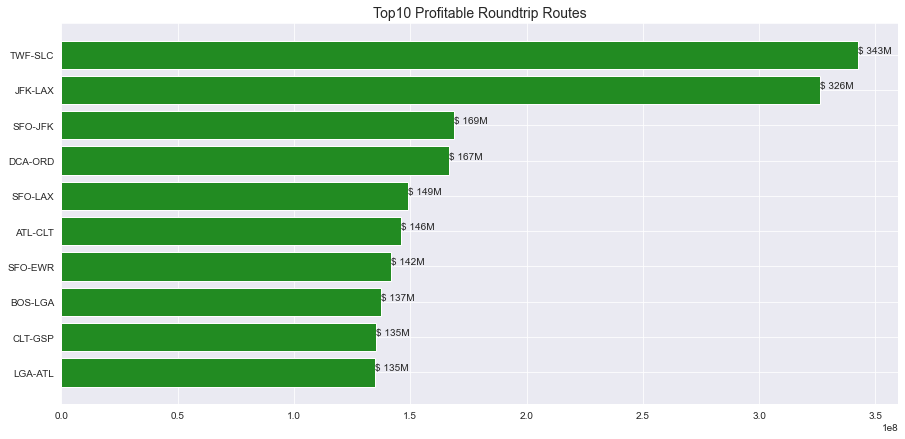

In [216]:
data = df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)
data=data.sort_values(by='TOTAL PROFIT',ascending=True)
fig, ax = plt.subplots(figsize=(15, 7))

ax.barh(data['ORIGIN_x']+'-'+data['DESTINATION_x'], data['TOTAL PROFIT'],color='forestgreen') 

ax.set_title('Top10 Profitable Roundtrip Routes',
             loc='center' ,fontsize=14)
def Million(x):
    x=int(x/1000000+0.5)
    return '$ '+str(x)+'M'

for a,b in zip(data['ORIGIN_x']+'-'+data['DESTINATION_x'], data['TOTAL PROFIT']):
    plt.text(b,a,
             Million(b),
             ha='left', 
             va='bottom',
            )

plt.show()

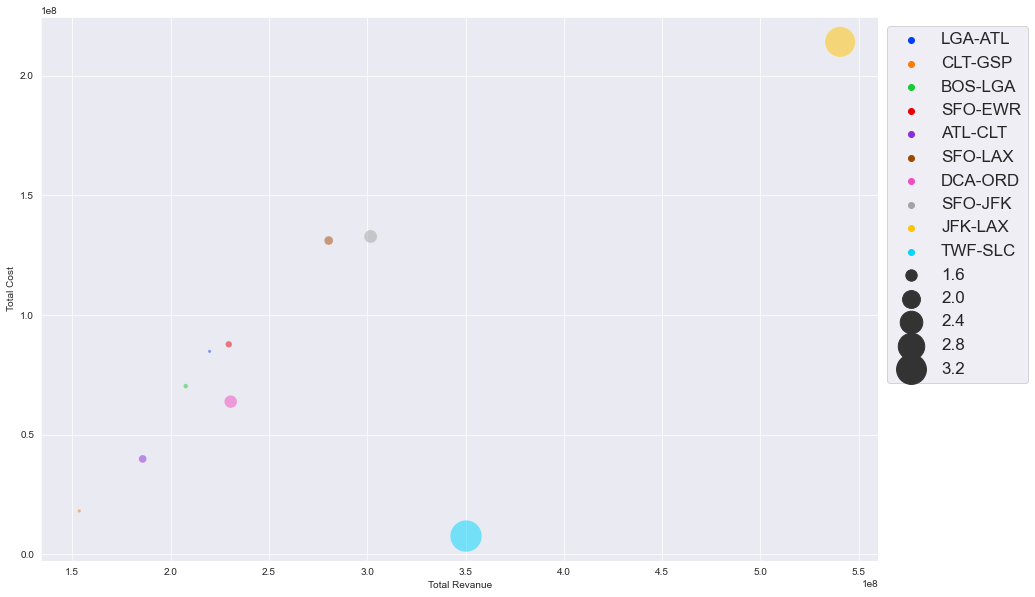

In [232]:
import seaborn as sns
# set seaborn "whitegrid" theme
sns.set_style("darkgrid")

plt.figure(figsize=(15, 10))

data = df_Q2_final[df_Q2_final.index%2==1].reset_index(drop=True).head(10)
data=data.sort_values(by='TOTAL PROFIT',ascending=True)
data['TOTAL PROFIT']=data['TOTAL PROFIT'].apply(lambda x:int(x))
# use the scatterplot function
sns.scatterplot(data=data, x="TOTAL REVENUE", y="TOTAL COST", size="TOTAL PROFIT", 
                hue=data['ORIGIN_x']+'-'+data['DESTINATION_x'], palette = 'bright',
                edgecolors="black", alpha=0.5, sizes=(10, 1000))

# Add titles (main and on axis)
plt.xlabel("Total Revanue")
plt.ylabel("Total Cost")

# Locate the legend outside of the plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)

# show the graph
plt.show()

### Q3: The 5 round trip routes that you recommend to invest in based on any factors that you choose.

In [264]:
df_Q3=DataInnerLink(df_Q1_sort,df_Q2_final,['ORIGIN','DESTINATION'],['ORIGIN_x','DESTINATION_x'])
df_Q3.sort_values(by = 'TOTAL PROFIT',ascending = False)
#思路是找到利润最大的，所以把航班总利润从大到小排序，ascending = False代表descending

,ORIGIN,DESTINATION,Flight_Num,ORIGIN_x,DESTINATION_x,PROFIT_x,REVENUE_x,COST_x,ORIGIN_y,DESTINATION_y,PROFIT_y,REVENUE_y,COST_y,TOTAL PROFIT,TOTAL REVENUE,TOTAL COST
7,LAX,JFK,6299,LAX,JFK,1.694834e+08,2.776431e+08,1.081598e+08,JFK,LAX,1.567959e+08,2.628762e+08,1.060802e+08,3.262793e+08,5.405193e+08,2.142400e+08
6,JFK,LAX,6299,JFK,LAX,1.567959e+08,2.628762e+08,1.060802e+08,LAX,JFK,1.694834e+08,2.776431e+08,1.081598e+08,3.262793e+08,5.405193e+08,2.142400e+08
42,JFK,SFO,3700,JFK,SFO,1.134064e+08,1.796485e+08,6.624207e+07,SFO,JFK,5.546355e+07,1.220894e+08,6.662583e+07,1.688700e+08,3.017379e+08,1.328679e+08
43,SFO,JFK,3700,SFO,JFK,5.546355e+07,1.220894e+08,6.662583e+07,JFK,SFO,1.134064e+08,1.796485e+08,6.624207e+07,1.688700e+08,3.017379e+08,1.328679e+08
44,ORD,DCA,3678,ORD,DCA,7.708651e+07,1.091092e+08,3.202266e+07,DCA,ORD,8.965769e+07,1.214200e+08,3.176234e+07,1.667442e+08,2.305292e+08,6.378499e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SAN,SEA,2339,SAN,SEA,1.842943e+07,4.284859e+07,2.441916e+07,SEA,SAN,1.674715e+07,4.065559e+07,2.390844e+07,3.517658e+07,8.350418e+07,4.832760e+07
122,SAN,LAS,2798,SAN,LAS,1.932893e+07,3.810368e+07,1.877474e+07,LAS,SAN,1.030328e+07,2.943145e+07,1.912818e+07,2.963221e+07,6.753513e+07,3.790292e+07
123,LAS,SAN,2798,LAS,SAN,1.030328e+07,2.943145e+07,1.912818e+07,SAN,LAS,1.932893e+07,3.810368e+07,1.877474e+07,2.963221e+07,6.753513e+07,3.790292e+07
95,SJC,SAN,3019,SJC,SAN,7.474310e+06,2.938315e+07,2.190884e+07,SAN,SJC,9.867801e+06,3.210415e+07,2.223635e+07,1.734211e+07,6.148730e+07,4.414519e+07


In [265]:
df_Q3['PROFIT/FLIGHT']=df_Q3['TOTAL PROFIT']/df_Q3['Flight_Num']#求出每个航班的平均利润
df_Q3_final=df_Q3.sort_values(by='PROFIT/FLIGHT',ascending=False).reset_index(drop=True)
#“df_Q3_final=df_Q3.sort_values(by='PROFIT/FLIGHT',ascending=False).” 求出平均利润，排序，从大到小，
#reset_index(drop=True) 代表了重新设置上一行的index，7.6.42.。。。。变成0.1.2.3.。。为了美观
df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)
#上列的表显示了从a到b，从b到a的roundtrip重复，现在把index%2==1，求出odd number，避免重复，现在找出平均利润最大的10个航线

,ORIGIN,DESTINATION,Flight_Num,ORIGIN_x,DESTINATION_x,PROFIT_x,REVENUE_x,COST_x,ORIGIN_y,DESTINATION_y,PROFIT_y,REVENUE_y,COST_y,TOTAL PROFIT,TOTAL REVENUE,TOTAL COST,PROFIT/FLIGHT
0,EWR,SFO,2411,EWR,SFO,7.042565e+07,1.144512e+08,4.402558e+07,SFO,EWR,7.137320e+07,1.151148e+08,4.374164e+07,1.417988e+08,2.295661e+08,8.776722e+07,58813.292852
1,LAX,JFK,6299,LAX,JFK,1.694834e+08,2.776431e+08,1.081598e+08,JFK,LAX,1.567959e+08,2.628762e+08,1.060802e+08,3.262793e+08,5.405193e+08,2.142400e+08,51798.584031
2,CLT,ATL,3074,CLT,ATL,7.381112e+07,9.357403e+07,1.976291e+07,ATL,CLT,7.213032e+07,9.219435e+07,2.006403e+07,1.459414e+08,1.857684e+08,3.982694e+07,47476.070066
3,JFK,SFO,3700,JFK,SFO,1.134064e+08,1.796485e+08,6.624207e+07,SFO,JFK,5.546355e+07,1.220894e+08,6.662583e+07,1.688700e+08,3.017379e+08,1.328679e+08,45640.527901
4,DCA,ORD,3678,DCA,ORD,8.965769e+07,1.214200e+08,3.176234e+07,ORD,DCA,7.708651e+07,1.091092e+08,3.202266e+07,1.667442e+08,2.305292e+08,6.378499e+07,45335.561031
5,ATL,MSP,2410,ATL,MSP,5.589611e+07,7.895353e+07,2.305742e+07,MSP,ATL,5.028600e+07,7.339122e+07,2.310522e+07,1.061821e+08,1.523448e+08,4.616264e+07,44058.968721
6,CLT,ORD,2349,CLT,ORD,5.135119e+07,7.172827e+07,2.037708e+07,ORD,CLT,4.906439e+07,6.917119e+07,2.010680e+07,1.004156e+08,1.408995e+08,4.048388e+07,42748.224610
7,ATL,RDU,2480,ATL,RDU,5.633652e+07,7.336343e+07,1.702691e+07,RDU,ATL,4.899103e+07,6.595264e+07,1.696161e+07,1.053276e+08,1.393161e+08,3.398851e+07,42470.788172
8,IAH,DFW,2901,IAH,DFW,5.945130e+07,7.908775e+07,1.963645e+07,DFW,IAH,5.883195e+07,7.869751e+07,1.986556e+07,1.182832e+08,1.577853e+08,3.950201e+07,40773.267769
9,DTW,ATL,2598,DTW,ATL,4.872323e+07,6.975094e+07,2.102771e+07,ATL,DTW,5.578645e+07,7.679572e+07,2.100927e+07,1.045097e+08,1.465467e+08,4.203699e+07,40226.973003


In [272]:
df_Q3_og = pd.DataFrame({'ORIGIN':df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)['ORIGIN'],
            'DESTINATION': df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)['DESTINATION'],
            'FLIGHT NUMBER': df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)['Flight_Num'],
            'TOTAL PROFIT':df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)['TOTAL PROFIT'],
            'PROFIT/FLIGHT':df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(10)['PROFIT/FLIGHT']})
df_Q3_og.head(5)
#从上图中取出我要的最直观的数据，做表，回答问题

,ORIGIN,DESTINATION,FLIGHT NUMBER,TOTAL PROFIT,PROFIT/FLIGHT
0,EWR,SFO,2411,1.417988e+08,58813.292852
1,LAX,JFK,6299,3.262793e+08,51798.584031
2,CLT,ATL,3074,1.459414e+08,47476.070066
3,JFK,SFO,3700,1.688700e+08,45640.527901
4,DCA,ORD,3678,1.667442e+08,45335.561031


### Q4: The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

In [ ]:
#题目要求：为了breakeven，revenue和cost相等，收支平衡，所以要飞多少航班才能抵得上cost
#假设建设费100万，飞一次是赚10万，所以100万/10万=100， 需要飞100次才能赚回来

In [282]:
df_Q4=df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(5)
df_Q4['BREAKEVEN']=90000000/df_Q4['PROFIT/FLIGHT']
#90000000是机场建设费用/“'PROFIT/FLIGHT平均利润”=需要飞的次数，也就是BREAKEVEN
df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)
#做出来的结果从大到小排序

,ORIGIN,DESTINATION,Flight_Num,ORIGIN_x,DESTINATION_x,PROFIT_x,REVENUE_x,COST_x,ORIGIN_y,DESTINATION_y,PROFIT_y,REVENUE_y,COST_y,TOTAL PROFIT,TOTAL REVENUE,TOTAL COST,PROFIT/FLIGHT,BREAKEVEN
0,EWR,SFO,2411,EWR,SFO,7.042565e+07,1.144512e+08,4.402558e+07,SFO,EWR,7.137320e+07,1.151148e+08,4.374164e+07,1.417988e+08,2.295661e+08,8.776722e+07,58813.292852,1530.266299
1,LAX,JFK,6299,LAX,JFK,1.694834e+08,2.776431e+08,1.081598e+08,JFK,LAX,1.567959e+08,2.628762e+08,1.060802e+08,3.262793e+08,5.405193e+08,2.142400e+08,51798.584031,1737.499233
2,CLT,ATL,3074,CLT,ATL,7.381112e+07,9.357403e+07,1.976291e+07,ATL,CLT,7.213032e+07,9.219435e+07,2.006403e+07,1.459414e+08,1.857684e+08,3.982694e+07,47476.070066,1895.691869
3,JFK,SFO,3700,JFK,SFO,1.134064e+08,1.796485e+08,6.624207e+07,SFO,JFK,5.546355e+07,1.220894e+08,6.662583e+07,1.688700e+08,3.017379e+08,1.328679e+08,45640.527901,1971.931617
4,DCA,ORD,3678,DCA,ORD,8.965769e+07,1.214200e+08,3.176234e+07,ORD,DCA,7.708651e+07,1.091092e+08,3.202266e+07,1.667442e+08,2.305292e+08,6.378499e+07,45335.561031,1985.196564


In [283]:
df_Q4_og = pd.DataFrame({'ORIGIN':df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['ORIGIN'],
            'DESTINATION': df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['DESTINATION'],
            'FLIGHT NUMBER': df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['Flight_Num'],
            'TOTAL PROFIT':df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['TOTAL PROFIT'],
            'PROFIT/FLIGHT':df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['PROFIT/FLIGHT'],
            'BREAKEVEN':df_Q4.sort_values(by = 'PROFIT/FLIGHT',ascending = False)['BREAKEVEN']})
df_Q4_og.head(5)

,ORIGIN,DESTINATION,FLIGHT NUMBER,TOTAL PROFIT,PROFIT/FLIGHT,BREAKEVEN
0,EWR,SFO,2411,1.417988e+08,58813.292852,1530.266299
1,LAX,JFK,6299,3.262793e+08,51798.584031,1737.499233
2,CLT,ATL,3074,1.459414e+08,47476.070066,1895.691869
3,JFK,SFO,3700,1.688700e+08,45640.527901,1971.931617
4,DCA,ORD,3678,1.667442e+08,45335.561031,1985.196564


### Q5: Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

##### i. Total Revenue
##### ii. Total Cost
##### iii. Total Profit / Profit Ratio
##### iv. Profit per Flight
##### v. Occupancy Rate per Flight
##### vi. Delay rate / Delay time
##### vii. Air Time
##### viii. Distance
##### ix. Breakeven



#### Visalization

In [284]:
import datetime
Top5=pd.DataFrame({'ORIGIN':df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(5)['ORIGIN'],
                  'DESTINATION':df_Q3_final[df_Q3_final.index%2==1].reset_index(drop=True).head(5)['DESTINATION']})
df_top5=DataInnerLink(Top5,round_trip_flight,['ORIGIN','DESTINATION'],['ORIGIN','DESTINATION'],'left')
df_top5['Week']=df_top5['FL_DATE'].apply(lambda x: datetime.date(int(x[:4]), int(x[6]), int(x[8:10])).isocalendar()[1])

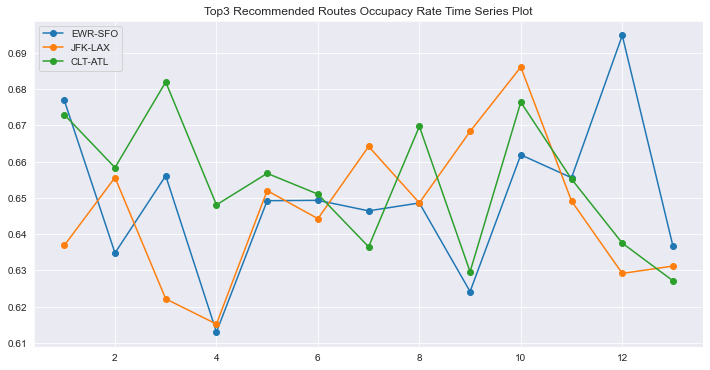

In [286]:
fig, ax = plt.subplots(figsize=(12, 6))
l3=df_top5.groupby(['ORIGIN','DESTINATION','Week']).mean()['OCCUPANCY_RATE'].iloc[26:39].reset_index()
l2=df_top5.groupby(['ORIGIN','DESTINATION','Week']).mean()['OCCUPANCY_RATE'].iloc[13:26].reset_index()
l=df_top5.groupby(['ORIGIN','DESTINATION','Week']).mean()['OCCUPANCY_RATE'].head(13).reset_index()

#l4=df_top5.groupby(['ORIGIN','DESTINATION','Week']).mean()['OCCUPANCY_RATE'].iloc[39:52].reset_index()
#l5=df_top5.groupby(['ORIGIN','DESTINATION','Week']).mean()['OCCUPANCY_RATE'].iloc[52:65].reset_index()
ax.plot(l3['Week'],l3['OCCUPANCY_RATE'],marker='o',label='EWR-SFO')
ax.plot(l2['Week'],l2['OCCUPANCY_RATE'],marker='o',label='JFK-LAX')
ax.plot(l['Week'],l['OCCUPANCY_RATE'],marker='o',label='CLT-ATL')

#ax.plot(l4['Week'],l4['OCCUPANCY_RATE'],marker='o',label='CLT-ATL')
#ax.plot(l5['Week'],l5['OCCUPANCY_RATE'],marker='o',label='SFO-JFK')
plt.title('Top3 Recommended Routes Occupacy Rate Time Series Plot')
plt.legend()